In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
sns.set(font_scale=1.5)

#Importing IGN Game Review data from csv
datadf1 = pd.read_csv('../data/Project/ign.csv')
datadf1['Name'] = datadf1['title']
#Replacing Strings in "platform" column to match strings in Video Game Sales CSV, "XXX" indicates non-console or portable gaming platforms
# or platforms that haven't been on sale in the past 16 years.
datadf1.platform.replace(['PlayStation Vita', 'Xbox 360', 'PlayStation Portable', 'Wii U', 'PlayStation 3'], ["PSV", "X360", "PSP", "WiiU", "PS3"], inplace=True)

datadf1.platform.replace([
    'Xbox One', 'X360', 'PS3', 'PlayStation 2', 'WiiU', 'PlayStation', 'Nintendo 64',
 'iPhone', 'Nintendo DS', 'Wireless', 'Game Boy Color', 'Nintendo DSi',
 'Nintendo 3DS', 'PC', 'PSV', 'PlayStation 4', 'Wii', 'Dreamcast', 'GameCube',
 'Xbox', 'PSP', 'iPad', 'Game Boy Advance', 'Lynx', 'Super NES', 'NES',
 'Macintosh', 'Genesis', 'TurboGrafx-16', 'Master System', 'Arcade', 'Android',
 'Vectrex', 'NeoGeo', 'N-Gage', 'Saturn', 'NeoGeo Pocket Color', 'WonderSwan',
 'iPod', 'Windows Phone', 'Game Boy', 'Sega 32X', 'DVD / HD Video Game',
 'Atari 2600', 'Atari 5200', 'Pocket PC', 'Nintendo 64DD', 'WonderSwan Color',
 'Linux', 'Game.Com', 'TurboGrafx-CD', 'Windows Surface', 'New Nintendo 3DS',
 'Commodore 64/128', 'SteamOS', 'Web Games', 'Sega CD', 'Ouya', 'Dreamcast VMU'], 
                         ["XOne", "X360", "PS3", "PS2", "XXX", "PS", "N64",
 "XXX", "DS", "XXX", "XXX", "DS", 
 "3DS", "XXX", "PSV", "PS4", "Wii", "XXX", "GC",
 "XB", "PSP", "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "XXX", "XXX",
 "XXX", "XXX", "XXX", "N64", "XXX",
 "XXX", "XXX", "XXX", "XXX", "3DS",
 "XXX", "XXX", "XXX", "XXX", "XXX", "XXX"], inplace=True)
datadf1.sort_values(["title","platform"], inplace=True, ascending=True)
datadf1['Platform'] = datadf1['platform']
datadf1.head(50)

C:\Users\funky\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,Name,Platform
18007,18007,Good,#IDARB,/games/it-draws-a-red-box/xbox-one-20014945,XOne,7.5,Party,N,2015,1,14,#IDARB,XOne
13215,13215,Amazing,'Splosion Man,/games/splosion-man/xbox-360-14337964,X360,9.0,Action,Y,2009,7,17,'Splosion Man,X360
13616,13616,Bad,.deTuned,/games/detuned/ps3-14346174,PS3,4.0,Other,N,2009,10,16,.deTuned,PS3
9869,9869,Mediocre,.hack//G.U. Vol. 1: Rebirth,/games/hackgu-vol-1-rebirth/ps2-748504,PS2,5.0,RPG,N,2007,10,5,.hack//G.U. Vol. 1: Rebirth,PS2
9871,9871,Mediocre,.hack//G.U. Vol. 2: Reminisce,/games/hackgu-vol-2-reminisce/ps2-751421,PS2,5.5,RPG,N,2007,10,5,.hack//G.U. Vol. 2: Reminisce,PS2
9866,9866,Mediocre,.hack//G.U. Vol.3: Redemption,/games/hackgu-vol3-redemption/ps2-751422,PS2,5.5,RPG,N,2007,10,5,.hack//G.U. Vol.3: Redemption,PS2
4609,4609,Great,.hack//INFECTION (Part 1),/games/hackinfection-demo-disc/ps2-17477,PS2,8.5,"Action, RPG",Y,2003,2,10,.hack//INFECTION (Part 1),PS2
4792,4792,Great,.hack//MUTATION (Part 2),/games/hackmutation-demo-disc/ps2-499463,PS2,8.4,"Action, RPG",N,2003,5,5,.hack//MUTATION (Part 2),PS2
5134,5134,Great,.hack//OUTBREAK (Part 3),/games/hackoutbreak-part-3/ps2-499464,PS2,8.4,"Action, RPG",N,2003,9,9,.hack//OUTBREAK (Part 3),PS2
5526,5526,Great,.hack//QUARANTINE (Part 4),/games/hackquarantine-demo-disc/ps2-499465,PS2,8.3,"Action, RPG",N,2004,1,13,.hack//QUARANTINE (Part 4),PS2


In [62]:
#Import Video Game Sales CSV and showing Platform strings to match to datadf1
datadf2 = pd.read_csv('../data/Project/vgsales.csv')
print datadf2.Platform.unique()
print datadf1.platform.unique()
datadf2.sort_values(["Name","Platform"], inplace=True, ascending=True)
datadf2.head()



['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['XOne' 'X360' 'PS3' 'PS2' 'XXX' 'PS' 'N64' 'DS' '3DS' 'PS4' 'PSV' 'Wii'
 'GC' 'XB' 'PSP']


(16598, 11)

In [58]:
#Perform a multi-column merge of datadf1 and datadf2 on column and platform values.
new_df = pd.merge(datadf1, datadf2,  how='left', left_on=['Name','Platform'], right_on = ['Name','Platform'])
new_df.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,...,Platform,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,18007,Good,#IDARB,/games/it-draws-a-red-box/xbox-one-20014945,XOne,7.5,Party,N,2015,1,...,XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13215,Amazing,'Splosion Man,/games/splosion-man/xbox-360-14337964,X360,9.0,Action,Y,2009,7,...,X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13616,Bad,.deTuned,/games/detuned/ps3-14346174,PS3,4.0,Other,N,2009,10,...,PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9869,Mediocre,.hack//G.U. Vol. 1: Rebirth,/games/hackgu-vol-1-rebirth/ps2-748504,PS2,5.0,RPG,N,2007,10,...,PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9871,Mediocre,.hack//G.U. Vol. 2: Reminisce,/games/hackgu-vol-2-reminisce/ps2-751421,PS2,5.5,RPG,N,2007,10,...,PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# creating a new dataframe removing rows with NaN/null values in either "Global_Sales" or "score" columns

new_df = new_df[np.isfinite(new_df['Global_Sales'])]
merged2 = new_df[np.isfinite(new_df['score'])]

In [18]:
#Check shape of new dataframe
merged2.shape

(6480, 22)

In [19]:
#Check number of data points per platform
merged2['Platform'].value_counts()

PS2     1182
X360     752
DS       749
PS3      665
XB       622
PS       595
Wii      565
PSP      396
GC       396
N64      209
PS4      108
3DS       94
XOne      92
PSV       55
Name: Platform, dtype: int64

In [60]:
#For train test split later
merged2['score'] = merged2.score

(16598, 11)

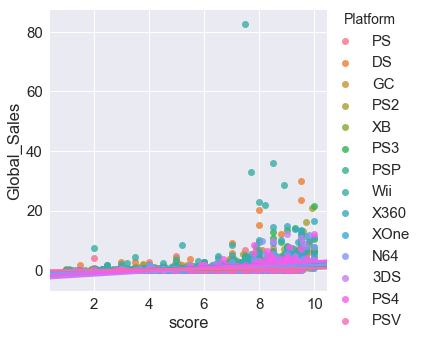

In [23]:
#Visualizing dataset information in a scatterplot broken out by platform
sns.lmplot(x='score', y='Global_Sales', hue='Platform', data=merged2, ci=None)

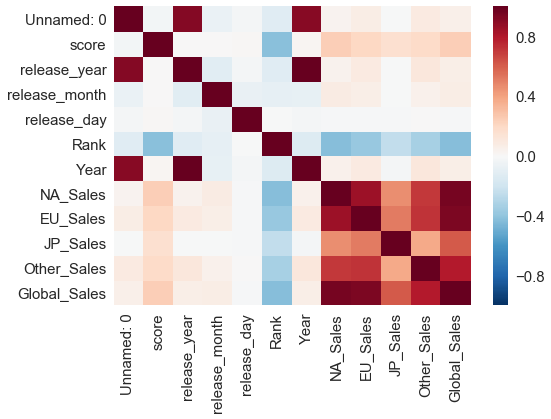

In [24]:
#examine heatmap of correlations for dataframe 
sns.heatmap(merged2.corr())

In [25]:
#score does seem to be mildly correlated with Global Sales and North American sales.
#Given the shape of the data from the scatterplot, it looks like there might
#be a greater correlation for games that are at least rated 6 or higher.

#creating a new dataframe that only includes titles with a rating equal 
#to or higher than 6
sixplus = merged2.loc[merged2['score'] >= 6]

In [26]:
sixplus['Platform'].value_counts()

PS2     930
X360    580
PS3     526
XB      522
DS      499
PS      435
Wii     336
GC      321
PSP     305
N64     158
PS4      93
XOne     83
3DS      72
PSV      47
Name: Platform, dtype: int64

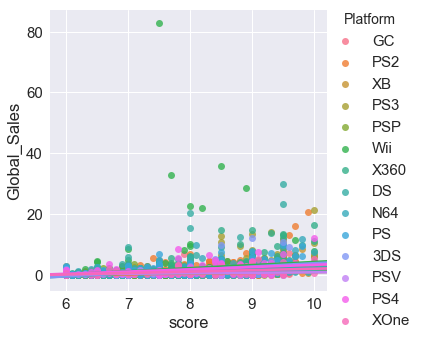

In [31]:
sns.lmplot(x='score', y='Global_Sales', hue='Platform', data=sixplus, ci=None)

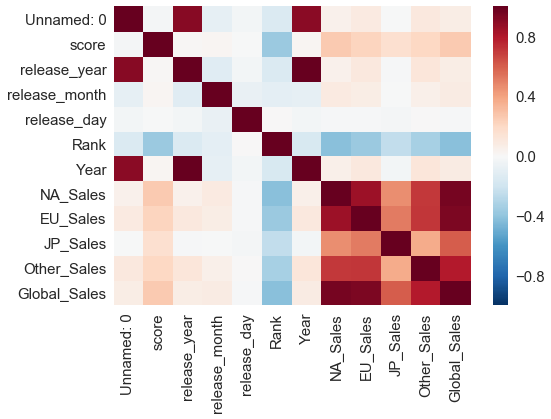

In [32]:
sns.heatmap(sixplus.corr())

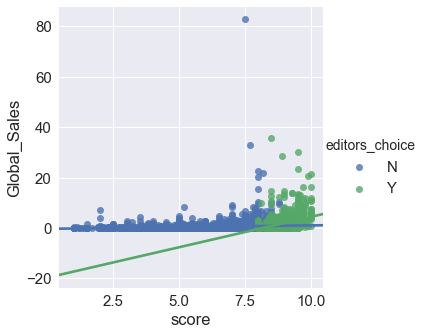

In [33]:
#Another interesting categorical feature of the data is the "Editor's Choice" aspect of game rating.
#Editors can award video games the title based on their opinion of the game's lasting appeal. 
sns.lmplot(x='score', y='Global_Sales', hue='editors_choice', data=merged2, ci=None)

In [45]:
feature_cols = ['score']
from sklearn.cross_validation import train_test_split
X = merged2[feature_cols]
y = merged2.Global_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [46]:
# before splitting
print X.shape

# after splitting
print X_train.shape
print X_test.shape

(6480, 1)
(4860, 1)
(1620, 1)


In [47]:
# before splitting
print y.shape

# after splitting
print y_train.shape
print y_test.shape

(6480L,)
(4860L,)
(1620L,)


In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print linreg.coef_

[ 0.27595441]


In [ ]:
np.sqrt(np.mean((predictions-targets)**2))